In [17]:
import pandas as pd

In [18]:
sms = pd.read_csv('/Users/yeabinmoon/Documents/ibs_course/BUS243_NLP/data/kaggle/train.csv',
usecols=['text','target'])

In [19]:
sms

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...
7608,Two giant cranes holding a bridge collapse int...,1
7609,@aria_ahrary @TheTawniest The out of control w...,1
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,Police investigating after an e-bike collided ...,1


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize.casual import casual_tokenize
from nltk.tokenize import TweetTokenizer

tfidf_model = TfidfVectorizer(tokenizer=TweetTokenizer().tokenize)
tfidf_docs = tfidf_model.fit_transform(raw_documents=sms.text).toarray()
tfidf_docs.shape

(7613, 23193)

In [21]:
mask = sms.target.astype(bool).values 

In [22]:
spam_centroid = tfidf_docs[mask].mean(axis=0)
ham_centroid = tfidf_docs[~mask].mean(axis=0)

In [23]:
spamminess_score = tfidf_docs.dot(spam_centroid - ham_centroid)

In [24]:
from sklearn.preprocessing import MinMaxScaler
sms['lda_score'] = MinMaxScaler().fit_transform(spamminess_score.reshape(-1,1))
sms['lda_predict'] = (sms.lda_score > .7).astype(int)

In [25]:
(1. - (sms.target - sms.lda_predict).abs().sum() / len(sms)).round(3)

0.764

In [26]:
tfidf_model = TfidfVectorizer(tokenizer=TweetTokenizer(strip_handles=True, reduce_len=True).tokenize)
tfidf_docs = tfidf_model.fit_transform(raw_documents=sms.text).toarray()
tfidf_docs.shape

(7613, 20873)

In [27]:
mask = sms.target.astype(bool).values 
spam_centroid = tfidf_docs[mask].mean(axis=0)
ham_centroid = tfidf_docs[~mask].mean(axis=0)
spamminess_score = tfidf_docs.dot(spam_centroid - ham_centroid)
sms['lda_score'] = MinMaxScaler().fit_transform(spamminess_score.reshape(-1,1))
sms['lda_predict'] = (sms.lda_score > .7).astype(int)
(1. - (sms.target - sms.lda_predict).abs().sum() / len(sms)).round(3)

0.762

Text(0, 0.5, ' y')

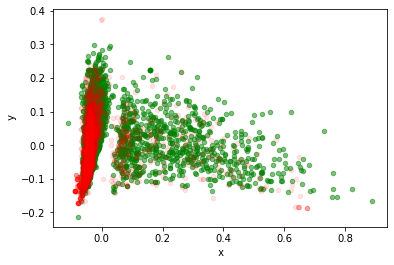

In [28]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn
pca_model = PCA(n_components=3)
tfidf_docs_3d = pca_model.fit_transform(tfidf_docs)
df = pd.DataFrame(tfidf_docs_3d)
ax = df[~mask].plot(x=0, y=1, kind='scatter', alpha=.5, c='green')
df[mask].plot(x=0, y=1, ax=ax, alpha=.1, kind='scatter', c='red')
plt.xlabel(' x')
plt.ylabel(' y')

In [29]:
import plotly as py
spam_trace = dict(
        x=df[0][mask], y=df[1][mask], z=df[2][mask],
        type="scatter3d", mode='markers',
        marker= dict(size=3, color='red', line=dict(width=0)) 
    )
ham_trace = dict(
        x=df[0][~mask], y=df[1][~mask], z=df[2][~mask],
        type="scatter3d", mode='markers',
        marker= dict(size=3, color='green', line=dict(width=0)) 
    )
fig = dict(data=[ham_trace, spam_trace], layout={'title': 'LDA Spamminess Model'})
py.offline.plot(fig, filename='lda_spam_3d_scatter.html')

'lda_spam_3d_scatter.html'

In [30]:
from pugnlp.stats import Confusion

/opt/anaconda3/lib/python3.9/site-packages/pugnlp/constants.py:136: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.

/opt/anaconda3/lib/python3.9/site-packages/pugnlp/constants.py:158: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.

/opt/anaconda3/lib/python3.9/site-packages/pugnlp/tutil.py:100: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.

/opt/anaconda3/lib/python3.9/site-packages/pugnlp/util.py:80: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.

/opt/anaconda3/lib/python3.9/site-packages/pugnlp/stats.py:25: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Impor

In [32]:
Confusion(sms['target lda_predict'.split()])

/opt/anaconda3/lib/python3.9/site-packages/pugnlp/stats.py:504: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access

/opt/anaconda3/lib/python3.9/site-packages/pugnlp/stats.py:510: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access

/opt/anaconda3/lib/python3.9/site-packages/pugnlp/stats.py:513: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

/opt/anaconda3/lib/python3.9/site-packages/pugnlp/stats.py:517: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



lda_predict,0,1
target,,
0,3703,639
1,1176,2095
